Diagram-1


<IPython.core.display.Latex object>

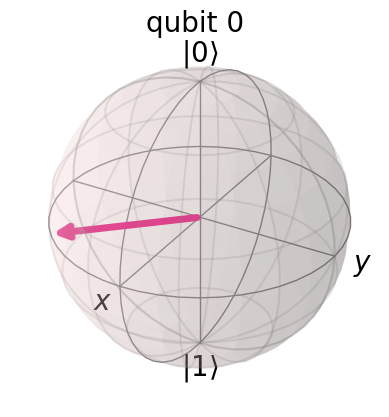

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, BasicAer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result.utils import marginal_counts
from qiskit.quantum_info import random_statevector

#Creating entangled pair of qubits
def createBell(qc, a, b):
    qc.h(a)
    qc.cx(a,b)


#Alice applies CNOT to q1(controlled by |ψ⟩) & Hadamard gate to |ψ⟩
def aliceGates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)


#Alice measures both of her qubits q1 and |ψ⟩ and stores result in classical bits.
#Then she sends the two bits to Bob
def measureNSend(qc, a, b):
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)


#Bob owns q2. He applies X & Z gates respectively when state of classical bits is 01 and 10 respectively.
def bobGates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)



# Create random 1-qubit state and display it using bloch sphere
print("Diagram-1")
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

Diagram-2


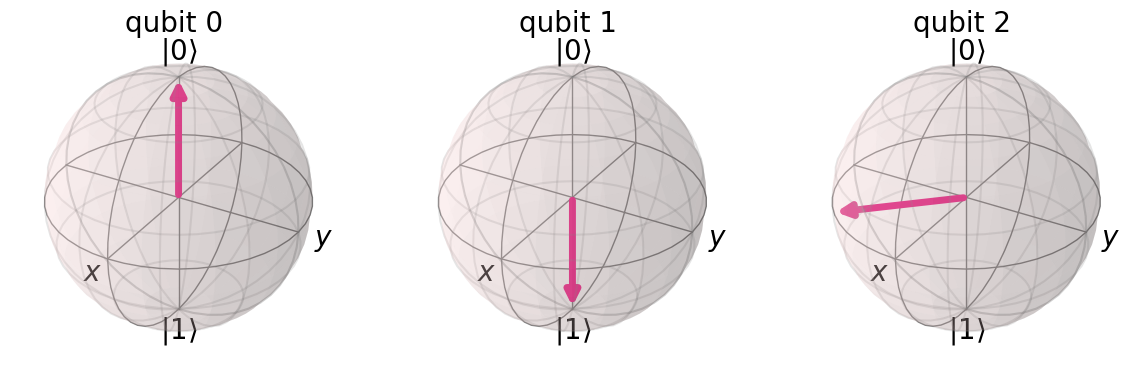

In [11]:
init_gate = Initialize(psi)
init_gate.label = "init"

#SETUP
#This protocol makes use of 3 qubits and 2 classical bits in 2 different registers
qreg = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qreg, crz, crx)

teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

createBell(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()
aliceGates(teleportation_circuit, 0, 1)
measureNSend(teleportation_circuit, 0, 1)
bobGates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

print("Diagram-2")
backend = Aer.get_backend('statevector_simulator')
result = execute(teleportation_circuit, backend).result()
out_vector = result.get_statevector()
plot_bloch_multivector(out_vector)

In [5]:
#Clearly, the state of q_0, shown by the bloch sphere in Diagram-1, is teleported to q_2(Diagram-2).
#And q_0 and q_1 collapse to either |0⟩ or |1⟩.
#This shows that our program is successfully run.